In [1]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.metrics import roc_curve
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame

<b>Reading Data</b>

In [2]:
#reading data
df = pd.read_csv(r"heart.csv")

In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

<b>Preprocessing</b>

In [4]:
#renaming columns
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope_type', 'num_major_vessels', 'thallium', 'output']

In [5]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope_type', 'num_major_vessels', 'thallium', 'output'],
      dtype='object')

In [6]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thallium,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
#changing numeric encodings to string
df.loc[df['chest_pain_type'] == 0, 'chest_pain_type'] = 'asymptomatic'
df.loc[df['chest_pain_type'] == 1, 'chest_pain_type'] = 'typical angina'
df.loc[df['chest_pain_type'] == 2, 'chest_pain_type'] = 'atypical angina'
df.loc[df['chest_pain_type'] == 3, 'chest_pain_type'] = 'non-anginal pain'

In [8]:
df.loc[df['rest_ecg_type'] == 0, 'rest_ecg_type'] = 'normal'
df.loc[df['rest_ecg_type'] == 1, 'rest_ecg_type'] = 'ST-T wave abnormality'
df.loc[df['rest_ecg_type'] == 2, 'rest_ecg_type'] = 'left ventricular hypertrophy'

In [9]:
df.loc[df['st_slope_type'] == 0, 'st_slope_type'] = 'downsloping'
df.loc[df['st_slope_type'] == 1, 'st_slope_type'] = 'flat'
df.loc[df['st_slope_type'] == 2, 'st_slope_type'] = 'upsloping'

In [10]:
df.loc[df['thallium'] == 0, 'thallium'] = 'nothing'
df.loc[df['thallium'] == 1, 'thallium'] = 'fixed defect'
df.loc[df['thallium'] == 2, 'thallium'] = 'normal'
df.loc[df['thallium'] == 3, 'thallium'] = 'reversible defect'

In [11]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thallium,output
0,63,1,non-anginal pain,145,233,1,normal,150,0,2.3,downsloping,0,fixed defect,1
1,37,1,atypical angina,130,250,0,ST-T wave abnormality,187,0,3.5,downsloping,0,normal,1
2,41,0,typical angina,130,204,0,normal,172,0,1.4,upsloping,0,normal,1
3,56,1,typical angina,120,236,0,ST-T wave abnormality,178,0,0.8,upsloping,0,normal,1
4,57,0,asymptomatic,120,354,0,ST-T wave abnormality,163,1,0.6,upsloping,0,normal,1


In [12]:
#creating dummy variables
df_data = pd.get_dummies(df, drop_first=False)
df_data.columns

Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'num_major_vessels',
       'output', 'chest_pain_type_asymptomatic',
       'chest_pain_type_atypical angina', 'chest_pain_type_non-anginal pain',
       'chest_pain_type_typical angina', 'rest_ecg_type_ST-T wave abnormality',
       'rest_ecg_type_left ventricular hypertrophy', 'rest_ecg_type_normal',
       'st_slope_type_downsloping', 'st_slope_type_flat',
       'st_slope_type_upsloping', 'thallium_fixed defect', 'thallium_normal',
       'thallium_nothing', 'thallium_reversible defect'],
      dtype='object')

In [13]:
#additional modifications to dummy variables
df_temp = df_data['thallium_fixed defect']
df_temp2 = df_data['rest_ecg_type_ST-T wave abnormality']
df_data = pd.get_dummies(df, drop_first=True)
df_data.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,output,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_type_left ventricular hypertrophy,rest_ecg_type_normal,st_slope_type_flat,st_slope_type_upsloping,thallium_normal,thallium_nothing,thallium_reversible defect
0,63,1,145,233,1,150,0,2.3,0,1,False,True,False,False,True,False,False,False,False,False
1,37,1,130,250,0,187,0,3.5,0,1,True,False,False,False,False,False,False,True,False,False
2,41,0,130,204,0,172,0,1.4,0,1,False,False,True,False,True,False,True,True,False,False
3,56,1,120,236,0,178,0,0.8,0,1,False,False,True,False,False,False,True,True,False,False
4,57,0,120,354,0,163,1,0.6,0,1,False,False,False,False,False,False,True,True,False,False


In [14]:
frames = [df_data, df_temp, df_temp2]
df_result = pd.concat(frames,axis=1)
df_result.drop('rest_ecg_type_normal',axis=1,inplace=True)
df_result.drop('thallium_nothing',axis=1,inplace=True)
df_resultc = df_result.copy()

In [15]:
df_result.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,output,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_type_left ventricular hypertrophy,st_slope_type_flat,st_slope_type_upsloping,thallium_normal,thallium_reversible defect,thallium_fixed defect,rest_ecg_type_ST-T wave abnormality
0,63,1,145,233,1,150,0,2.3,0,1,False,True,False,False,False,False,False,False,True,False
1,37,1,130,250,0,187,0,3.5,0,1,True,False,False,False,False,False,True,False,False,True
2,41,0,130,204,0,172,0,1.4,0,1,False,False,True,False,False,True,True,False,False,False
3,56,1,120,236,0,178,0,0.8,0,1,False,False,True,False,False,True,True,False,False,True
4,57,0,120,354,0,163,1,0.6,0,1,False,False,False,False,False,True,True,False,False,True


<b>Train Test Split and Normalization of Numeric Attributes</b>

In [16]:
X = df_result.drop('output', axis = 1)
Y = df_result['output']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(Y_train.shape))
print("y_test: {}".format(Y_test.shape))

X_train: (242, 19)
X_test: (61, 19)
y_train: (242,)
y_test: (61,)


In [18]:
X_train

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_type_left ventricular hypertrophy,st_slope_type_flat,st_slope_type_upsloping,thallium_normal,thallium_reversible defect,thallium_fixed defect,rest_ecg_type_ST-T wave abnormality
74,43,0,122,213,0,165,0,0.2,0,True,False,False,False,True,False,True,False,False,True
153,66,0,146,278,0,152,0,0.0,1,True,False,False,False,True,False,True,False,False,False
64,58,1,140,211,1,165,0,0.0,0,True,False,False,False,False,True,True,False,False,False
296,63,0,124,197,0,136,1,0.0,0,False,False,False,False,True,False,True,False,False,True
287,57,1,154,232,0,164,0,0.0,1,False,False,True,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,132,247,1,143,1,0.1,4,False,False,False,False,True,False,False,True,False,False
192,54,1,120,188,0,113,0,1.4,1,False,False,False,False,True,False,False,True,False,True
117,56,1,120,193,0,162,0,1.9,0,False,True,False,False,True,False,False,True,False,False
47,47,1,138,257,0,156,0,0.0,0,True,False,False,False,False,True,True,False,False,False


In [19]:
X_test

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_type_left ventricular hypertrophy,st_slope_type_flat,st_slope_type_upsloping,thallium_normal,thallium_reversible defect,thallium_fixed defect,rest_ecg_type_ST-T wave abnormality
225,70,1,145,174,0,125,1,2.6,0,False,False,False,False,False,False,False,True,False,True
152,64,1,170,227,0,155,0,0.6,0,False,True,False,False,True,False,False,True,False,False
228,59,1,170,288,0,159,0,0.2,0,False,True,False,False,True,False,False,True,False,False
201,60,1,125,258,0,141,1,2.8,1,False,False,False,False,True,False,False,True,False,False
52,62,1,130,231,0,146,0,1.8,3,True,False,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,44,0,118,242,0,149,0,0.3,1,True,False,False,False,True,False,True,False,False,True
302,57,0,130,236,0,174,0,0.0,1,False,False,True,False,True,False,True,False,False,False
26,59,1,150,212,1,157,0,1.6,0,True,False,False,False,False,True,True,False,False,True
108,50,0,120,244,0,162,0,1.1,0,False,False,True,False,False,True,True,False,False,True


In [20]:
numeric_list = ["age", "resting_blood_pressure","cholesterol","max_heart_rate_achieved","st_depression","num_major_vessels"]

In [21]:
minMaxScaler = MinMaxScaler()
X_train[numeric_list] = minMaxScaler.fit_transform(X_train[numeric_list])

In [22]:
X_test[numeric_list] = minMaxScaler.fit_transform(X_test[numeric_list])

<b>Random Forest</b>

In [23]:
#deteriming optimal number of trees

# n_estimators = [5,20,50,100, 500, 1000, 5000] # number of trees in the random forest

# random_grid = {'n_estimators': n_estimators}
# rf = RandomForestClassifier()
# from sklearn.model_selection import RandomizedSearchCV
# rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
#                n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

# rf_random.fit(X_train, Y_train)

# print ('Random grid: ', random_grid, '\n')
# # print the best parameters
# print ('Best Parameters: ', rf_random.best_params_, ' \n')

In [24]:
# creating classifier with training and testing
feature_names = [f"feature {i}" for i in range(X.shape[1])]
clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)

<Axes: xlabel='Predicted', ylabel='Actual'>

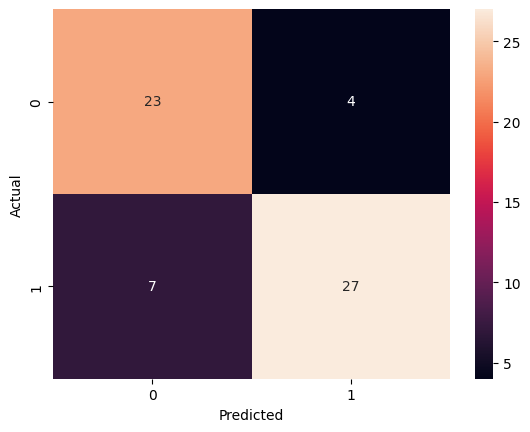

In [25]:
# confusion matrix
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, fmt='g')

In [26]:
print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))
plt.show()

print(classification_report(Y_test, Y_pred))

importances = list(clf.feature_importances_)

Accuracy:  0.819672131147541
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



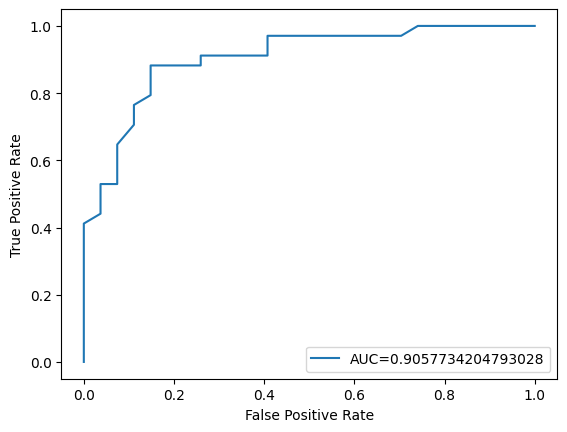

0.9057734204793028

In [27]:
#define metrics
Y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

auc

In [28]:
#feature importance
# columns = X.columns
# i=0

# while i<len(columns):
#     print(f" The importance of feature '{columns[i]}' is {round(importances[i] * 100, 2)}%.")
#     i+=1

Elapsed time to compute the importances: 0.019 seconds


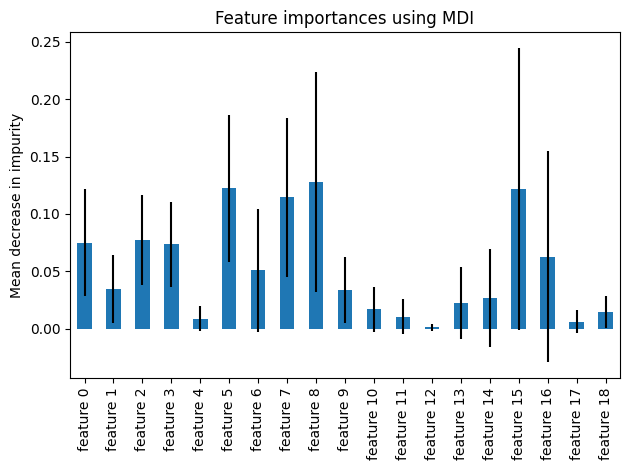

In [29]:
#feature importance
import time
import numpy as np

start_time = time.time()
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

<b>K-Nearest Neighbor (KNN)</b>

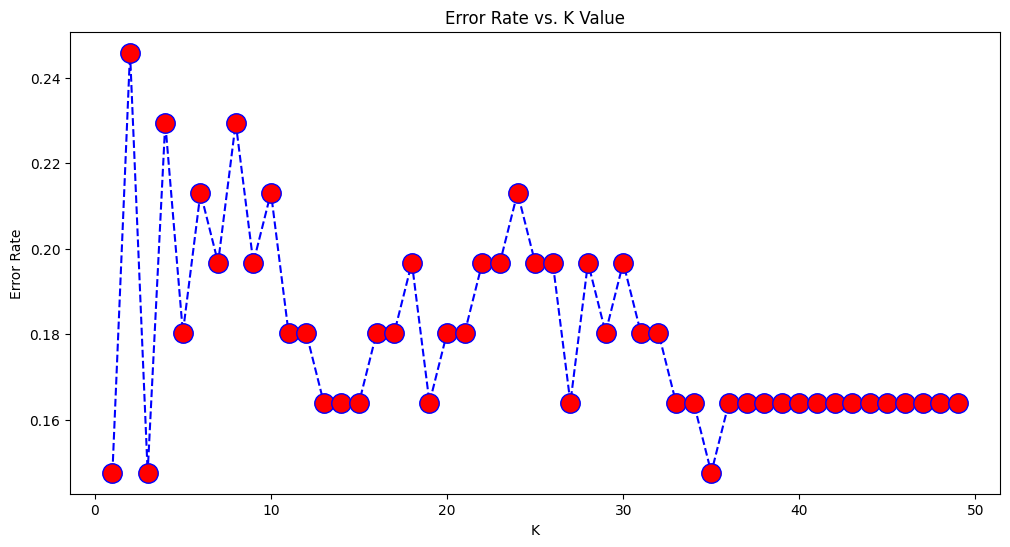

In [30]:
#error plot
error_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))
    
plt.figure(figsize=(12,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=14)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [31]:
#create a classifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred=knn.predict(X_test)

<Axes: xlabel='Predicted', ylabel='Actual'>

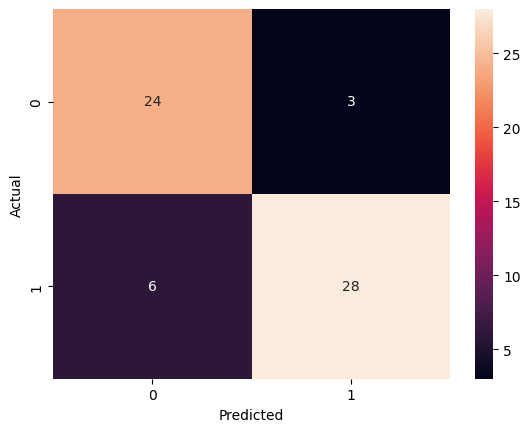

In [32]:
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, fmt='g')

In [33]:
print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))
plt.show()

print(classification_report(Y_test, Y_pred))

Accuracy:  0.8524590163934426
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        27
           1       0.90      0.82      0.86        34

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



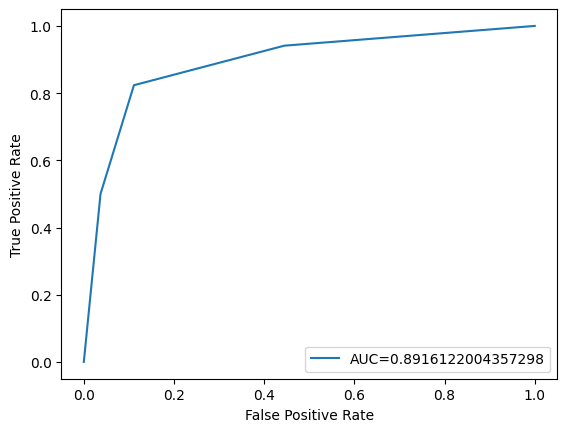

0.8916122004357298

In [34]:
#ROC curve
Y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

auc

<b>Support Vector Machine using linear kernel, training/testing and normalization</b>

In [35]:
#create a classifier
clf = svm.SVC(kernel="linear", C=1.0, probability=True)
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)

<Axes: xlabel='Predicted', ylabel='Actual'>

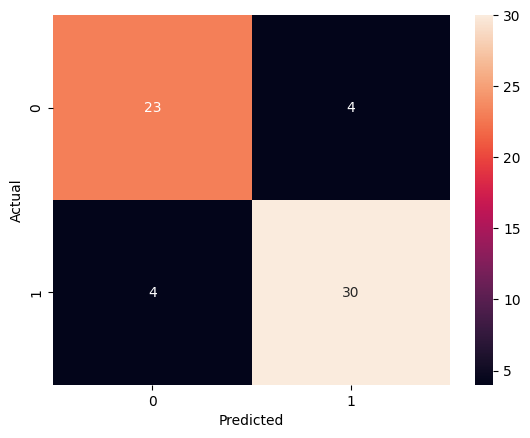

In [36]:
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, fmt='g')

In [37]:
print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))
plt.show()

print(classification_report(Y_test, Y_pred))

Accuracy:  0.8688524590163934
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



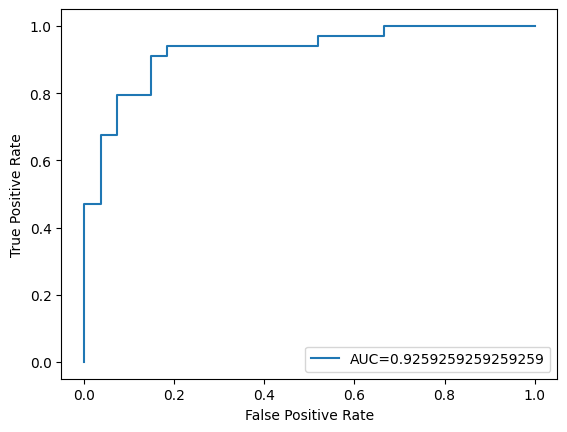

0.9259259259259259

In [38]:
#ROC curve
Y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

auc

<b>Naive Bayes on training/testing and with normalization</b>

In [39]:
#Create classifier
nv = GaussianNB()
#Fit data
nv.fit(X_train,Y_train) 

GaussianNB()

Accuracy:  0.8688524590163934


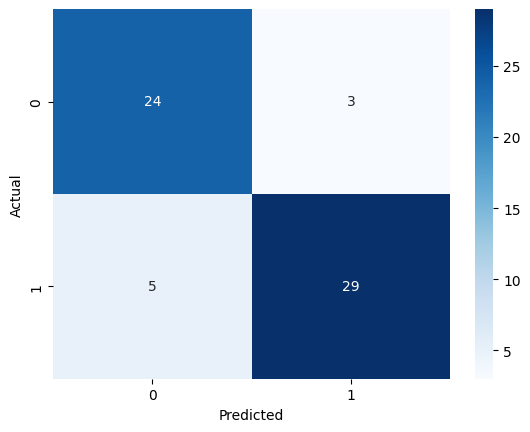

In [40]:
Y_pred = nv.predict(X_test) # store the prediction data
accuracy_score(Y_test,Y_pred) # calculate the accuracy

confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, cmap="Blues")

print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))
plt.show()

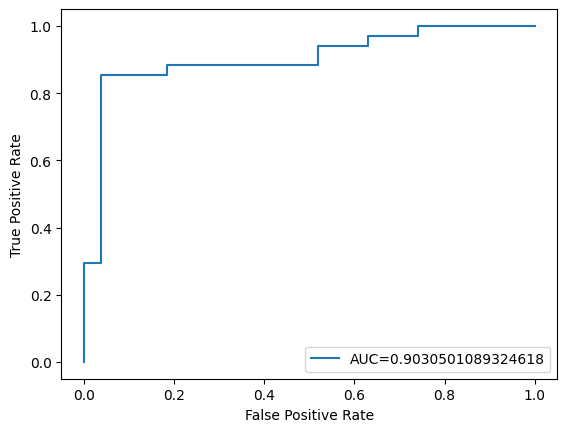

0.9030501089324618

In [41]:
#ROC curve
Y_pred_proba = nv.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

auc

<b>Logistic Regression with training/testing and normalization</b>

In [42]:
#Create classifier
logistic_regression= LogisticRegression(solver='lbfgs', max_iter=5000)
logistic_regression.fit(X_train,Y_train)
Y_pred=logistic_regression.predict(X_test)

In [43]:
#Coefficients
log_odds = logistic_regression.coef_[0]

print(pd.DataFrame(log_odds, 
             X_train.columns, 
             columns=['coef']))

                                                coef
age                                        -0.414175
sex                                        -1.132003
resting_blood_pressure                     -0.526606
cholesterol                                -0.456416
fasting_blood_sugar                        -0.140053
max_heart_rate_achieved                     1.020159
exercise_induced_angina                    -0.783811
st_depression                              -1.134735
num_major_vessels                          -2.273468
chest_pain_type_atypical angina             1.282606
chest_pain_type_non-anginal pain            1.034121
chest_pain_type_typical angina              0.731555
rest_ecg_type_left ventricular hypertrophy -0.300585
st_slope_type_flat                         -0.465020
st_slope_type_upsloping                     0.210536
thallium_normal                             0.755467
thallium_reversible defect                 -0.614726
thallium_fixed defect                       0.

In [44]:
#Calculating odds ratio
odds = np.exp(logistic_regression.coef_[0])

print(pd.DataFrame(odds, 
             X_train.columns, 
             columns=['odds coef']))

                                            odds coef
age                                          0.660886
sex                                          0.322387
resting_blood_pressure                       0.590606
cholesterol                                  0.633550
fasting_blood_sugar                          0.869312
max_heart_rate_achieved                      2.773637
exercise_induced_angina                      0.456662
st_depression                                0.321507
num_major_vessels                            0.102954
chest_pain_type_atypical angina              3.606023
chest_pain_type_non-anginal pain             2.812632
chest_pain_type_typical angina               2.078309
rest_ecg_type_left ventricular hypertrophy   0.740385
st_slope_type_flat                           0.628122
st_slope_type_upsloping                      1.234339
thallium_normal                              2.128605
thallium_reversible defect                   0.540789
thallium_fixed defect       

In [45]:
print(logistic_regression.intercept_)
plt.figure(figsize=(10,12))
coeffecients = pd.DataFrame(logistic_regression.coef_.ravel(),X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values(by=['Coeffecient'],inplace=True,ascending=False)
coeffecients

[1.04184499]


,Coeffecient
chest_pain_type_atypical angina,1.282606
chest_pain_type_non-anginal pain,1.034121
max_heart_rate_achieved,1.020159
thallium_normal,0.755467
chest_pain_type_typical angina,0.731555
rest_ecg_type_ST-T wave abnormality,0.273946
st_slope_type_upsloping,0.210536
thallium_fixed defect,0.010571
fasting_blood_sugar,-0.140053
rest_ecg_type_left ventricular hypertrophy,-0.300585


<Figure size 1000x1200 with 0 Axes>

<Axes: >

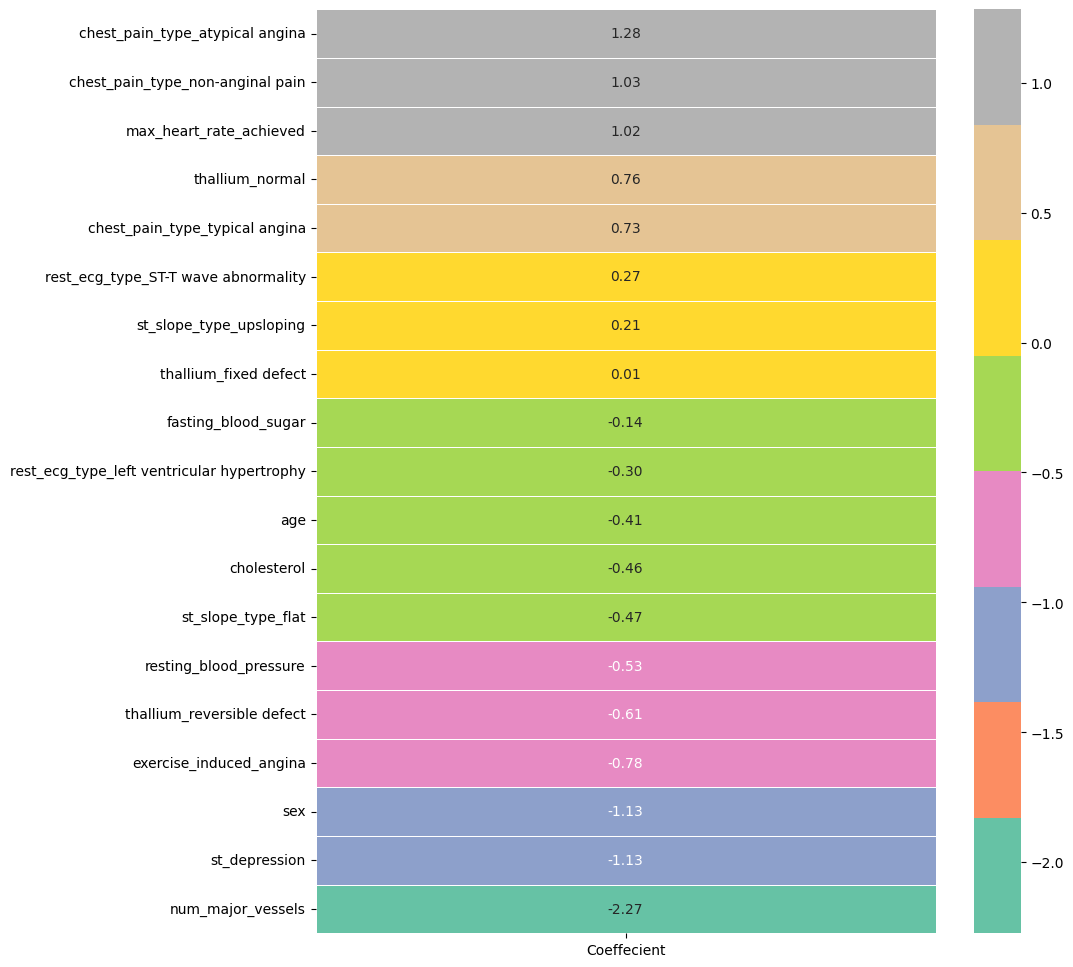

In [46]:
plt.figure(figsize=(10,12))
coeffecients = pd.DataFrame(logistic_regression.coef_.ravel(),X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values(by=['Coeffecient'],inplace=True,ascending=False)
sn.heatmap(coeffecients,annot=True,fmt='.2f',cmap='Set2',linewidths=0.5)

<Axes: xlabel='Predicted', ylabel='Actual'>

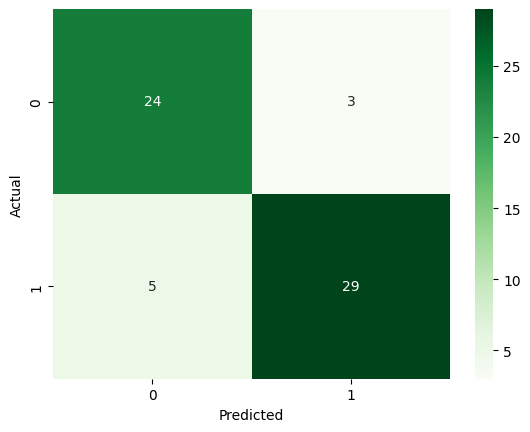

In [47]:
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, cmap='Greens')

In [48]:
print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))
plt.show()

print(classification_report(Y_test, Y_pred))

Accuracy:  0.8688524590163934
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.91      0.85      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



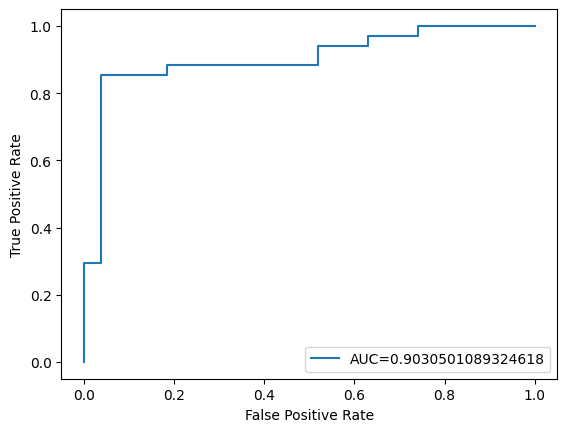

0.9030501089324618

In [49]:
#ROC curve
Y_pred_proba = nv.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

auc